<a href="https://colab.research.google.com/github/kay0710/SOCAR-AI-BOOT-CAMP/blob/main/Lab_3_Data_Analysis_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3. Data Analysis with Pandas

### 해당 실습 파일은 실제 data를 이용해 분석을 진행한 후 모델에 사용할 수 있는 형태로 바꾸기 위한 방법을 다룹니다.

### Python package인 pandas를 다루는 방법을 기본으로 하여 matplotlib를 통한 visualization 방법을 포함할 예정이며 그 외에 python을 사용할 때 유용한 기법들을 포함합니다.

### 실제로 pandas의 능숙한 사용을 위해서는 구글링과 직접 해보는 경험이 필요합니다. 실제 데이터를 가지고 필요한 함수를 찾아서 적용해 보세요!

### 해당 package들은 colab에는 기본으로 설치가 되어 있고 local device에서 진행하시는 분들은 pip를 이용해 쉽게 설치가 가능합니다.

### 해당 실습에서 사용할 package들은 다음과 같습니다.
- os
- pandas
- numpy
- matplotlib

### ref
- https://pandas.pydata.org/pandas-docs/version/1.3/user_guide/10min.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Load.

### Using os package

파일과 폴더에 접근하기 위한 경로는 string의 형태로 /를 이용해 직접 작성할 수도 있지만 os.path의 join method로 하는게 혼동과 오류의 여지가 적습니다.

In [ ]:
# os의 get current working directory method.
# 보통 python script를 실행하는 경우 해당 script의 위치를 얻지만, colab을 사용하고 있기 때문에 google drive 내의 위치를 줍니다.
# 접근하려는 데이터 파일의 정확한 경로를 알기 위해 먼저 현재 경로를 파악합니다.
p = os.getcwd()
print(p)

/content


In [ ]:
# os의 list directory method.
# 해당 directory 내에 있는 파일과 폴더의 이름을 list로 넘겨줍니다.
os.listdir(p)

['.config', 'drive', 'sample_data']

In [ ]:
# os.path의 join method.
# 직접 string으로 적어 경로를 만드는 게 아니라 join method를 사용해봅니다.
# 1st p = os.path.join(p, "drive")
# p = os.path.join(p, "MyDrive") # 윗 줄도 실행해서 p에는 이미 drive 까지 저장된 상태!!! (새로운 "MyDrive" 를 추가하는 격)
p = os.path.join(p, "prac")
print(p)
print(os.listdir(p))

/content/prac


FileNotFoundError: ignored

In [ ]:
data_dir = os.path.join(os.getcwd(), "drive", "MyDrive", "Colab Notebooks", "ch3", "data")
data_dir

'/content/drive/MyDrive/Colab Notebooks/ch3/data'

탐색기 등을 통해 directory에 접근하여 무슨 파일이 있는지 확인할 수 없거나 파일이 너무 많아 다루기 힘든 경우에는 os의 method들을 이용해 처리하는 것이 좋습니다.

In [ ]:
os.listdir(data_dir)

['fruit_data_with_colors.txt', 'socar_zone_recommendation.csv']

In [ ]:
# os.path의 isfile method. (파일인지 확인하는 method)
# 해당 경로가 파일인지 확인하는 method입니다. 비슷한 method로 isdir 등이 있습니다.

# listdir(data_dir) 에 있는 경로들(파일 포함)이 확인되고, 이를 f 에 저장한 후 if 조건문에 적용됨
# join 함수를 통해 data_dir 에 f 라는 경로를 추개해서 isfile 함수에 적용 --> 해당 경로가 file 이면 True
# if 문이 True 로 통과하면 path.join 함수에 의해 파일의 전체 경로(파일이름 포함)가 f_names 에 저장
f_names = [os.path.join(data_dir, f) for f in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, f))] 
f_names

['/content/drive/MyDrive/Colab Notebooks/ch3/data/fruit_data_with_colors.txt',
 '/content/drive/MyDrive/Colab Notebooks/ch3/data/socar_zone_recommendation.csv']

### Opening csv data file

In [ ]:
# pandas의 read csv method.
# csv 파일을 읽습니다. 비슷한 method로 read_excel method가 있으며 필요한 걸 찾아 사용하시면 됩니다.

# pandas 다루는 이유
#    numpy 는 숫자만 다룰 수 있으며, 하나의 data type 만 다룰 수 있음
#    pandas 는 data type 이 섞여 있어도 편하게 다룰 수 있음 
#    --> 일반적인 table data 는 여러 data type이 섞여 있으므로 전처리 후 모두 숫자로 변환하고 Numpy array로 바꿔서 사용
data = pd.read_csv(f_names[1], index_col=1)             # pandas 는 idx(row의 번호로 생각)와 column 으로 data 접근 가능
                                                        # 인수를 통해 index_col 을 설정하면 해당 col을 idx 대신 사용하게 됨  --> 이 때 중복에도 문제 없음
data.head()  # read 하는 data 수는 default 5 // 인수를 통해 조절 가능
             # float, string 등 다양한 data type 들이 출력됨


,reservation_id,reservation_return_at,reservation_start_at,member_age,member_gender,car_name,zone_name,zone_address,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,reservation_created_lat,reservation_created_lng
region,,,,,,,,,,,,,,,
서울특별시 강남구,27627768,2019-11-30 23:51:14,2019-11-30 22:50:00,26,male,[쏘카세이브] 레이,논현초교 공영주차장,서울 강남구 논현동 168,37.508205,127.026840,LIVING_ETC,COMMERCIAL_OFFICE,COMMERCIAL_HOTSPOT,37.508208,127.027491
경기도 성남시 분당구,27628040,2019-11-30 23:41:14,2019-11-30 23:00:00,28,female,더뉴레이,이마트 분당점 별관 주차장,경기 성남시 분당구 정자동 212,37.357533,127.119772,LIVING_APT,LIVING_VILLA,COMMERCIAL_HOTSPOT,37.359271,127.119733
경기도 의정부시,27628199,2019-11-30 23:47:18,2019-11-30 23:10:00,23,male,더뉴아반떼,안집주차장,경기 의정부시 의정부동 172-29,37.738136,127.050667,LIVING_ETC,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,37.738390,127.050588
서울특별시 서대문구,27628203,2019-11-30 23:51:08,2019-11-30 23:20:00,30,male,[쏘카세이브] 아반떼AD,아농스오피스텔 주차타워,서울 서대문구 연희동 136-7,37.567000,126.931296,LIVING_ETC,TRANSFER_BUS,ETC,37.566365,126.930759
경기도 성남시 수정구,27628502,2019-11-30 23:48:26,2019-11-30 23:30:00,27,male,[쏘카세이브] 프라이드,수진주차장,경기 성남시 수정구 수진동 62,37.440857,127.133057,LIVING_ETC,COMMERCIAL_HOTSPOT,ETC,37.438987,127.132633


In [ ]:
# .loc() : 특정 idx 를 기준으로 검색
# 이 경우는 idx 를 기준으로 검색하기 때문에 앞선 작업에서 idx 로 region을 설정하는 것이 선행되어야 함
data.loc["서울특별시 강서구"]

,reservation_id,reservation_return_at,reservation_start_at,member_age,member_gender,car_name,zone_name,zone_address,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,reservation_created_lat,reservation_created_lng
region,,,,,,,,,,,,,,,
서울특별시 강서구,19600422,2019-01-01 17:33:42,2018-12-31 17:30:00,48,male,아반떼AD,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY,NaN,NaN
서울특별시 강서구,19728911,2019-01-04 14:06:03,2019-01-03 08:00:00,35,male,투싼(경유),용정주차장,서울 강서구 방화동 608-9,37.565186,126.816185,LIVING_ETC,TRANSFER_SUBWAY,ETC,NaN,NaN
서울특별시 강서구,19753691,2019-01-01 16:17:40,2019-01-01 12:00:00,26,male,클리오,웨스트엔드 3차,서울 강서구 내발산동 750-10,37.553017,126.826775,LIVING_APT,COMMERCIAL_HOTSPOT,ETC,NaN,NaN
서울특별시 강서구,19765874,2019-01-03 19:51:13,2019-01-03 18:10:00,32,NaN,더뉴레이,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY,NaN,NaN
서울특별시 강서구,19839347,2019-01-04 19:20:00,2019-01-01 19:00:00,34,male,카니발 11인승,송정역 2번출구(운영종료),서울 강서구 공항동 12-3,37.562893,126.814697,LIVING_ETC,TRANSFER_SUBWAY,ETC,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
서울특별시 강서구,27626463,2019-11-30 22:35:13,2019-11-30 21:50:00,31,female,아반떼AD,까치주차장,서울 강서구 화곡동 353-8,37.533512,126.842262,LIVING_VILLA,LIVING_ETC,ETC,37.534710,126.843252
서울특별시 강서구,27626976,2019-11-30 23:40:18,2019-11-30 22:10:00,23,male,더뉴레이,마곡센트럴대방디엠시티오피스텔 1차 주차장,서울 강서구 마곡동 776-2,37.568141,126.840127,LIVING_APT,LIVING_VILLA,TRANSFER_SUBWAY,37.567863,126.840361
서울특별시 강서구,27627005,2019-11-30 23:39:45,2019-11-30 22:10:00,23,male,올뉴모닝,힐스테이트에코마곡나루역 오피스텔,서울 강서구 마곡동 760-1,37.567879,126.826692,LIVING_VILLA,TRANSFER_SUBWAY,COMMERCIAL_OFFICE,37.567353,126.826789


In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
# 아래 식을 수행하기 위해 idx 조건을 없애도록 다시 설정
data = pd.read_csv(f_names[1])

# data["column 이름"] : col의 이름을 기준으로 접근
data["region"]

0           서울특별시 강서구
1            울산광역시 남구
2             경기도 김포시
3            경기도 남양주시
4           서울특별시 강서구
             ...     
751544      서울특별시 강남구
751545    경기도 성남시 분당구
751546       경기도 의정부시
751547     서울특별시 서대문구
751548    경기도 성남시 수정구
Name: region, Length: 751549, dtype: object

In [ ]:
# pandas 는 Series 라는 1차원 구조를 쌓아서 Dataframe 이라는 2차원 구조를 생성
type(data["region"])

pandas.core.series.Series

In [ ]:
data.shape

(751549, 16)

In [ ]:
# column 의 수를 조회
# len 함수가 가능하다는 것은 for 문을 돌릴 수 있다는 의미 --> 해볼 것!!!
len(data)

751549

In [ ]:
data

,reservation_id,region,reservation_return_at,reservation_start_at,member_age,member_gender,car_name,zone_name,zone_address,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,reservation_created_lat,reservation_created_lng
0,19600422,서울특별시 강서구,2019-01-01 17:33:42,2018-12-31 17:30:00,48,male,아반떼AD,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY,NaN,NaN
1,19637831,울산광역시 남구,2019-01-01 12:08:55,2018-12-31 16:00:00,25,male,스포티지,우정유료주차장,울산 남구 삼산동 1481-10,35.536034,129.339783,TRANSFER_TERMINAL,TRANSFER_TERMINAL,COMMERCIAL_HOTSPOT,NaN,NaN
2,19670646,경기도 김포시,2019-01-02 17:30:00,2019-01-02 14:50:00,34,male,카니발 11인승,월드애비뉴,경기 김포시 구래동 6880-7,37.645571,126.627879,LIVING_APT,COMMERCIAL_HOTSPOT,ETC,NaN,NaN
3,19692831,경기도 남양주시,2019-01-01 20:53:09,2018-12-31 11:00:00,23,male,아반떼AD,제뉴빌딩주차장,경기 남양주시 호평동 642-2,37.654861,127.244576,LIVING_APT,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,NaN,NaN
4,19728911,서울특별시 강서구,2019-01-04 14:06:03,2019-01-03 08:00:00,35,male,투싼(경유),용정주차장,서울 강서구 방화동 608-9,37.565186,126.816185,LIVING_ETC,TRANSFER_SUBWAY,ETC,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751544,27627768,서울특별시 강남구,2019-11-30 23:51:14,2019-11-30 22:50:00,26,male,[쏘카세이브] 레이,논현초교 공영주차장,서울 강남구 논현동 168,37.508205,127.026840,LIVING_ETC,COMMERCIAL_OFFICE,COMMERCIAL_HOTSPOT,37.508208,127.027491
751545,27628040,경기도 성남시 분당구,2019-11-30 23:41:14,2019-11-30 23:00:00,28,female,더뉴레이,이마트 분당점 별관 주차장,경기 성남시 분당구 정자동 212,37.357533,127.119772,LIVING_APT,LIVING_VILLA,COMMERCIAL_HOTSPOT,37.359271,127.119733
751546,27628199,경기도 의정부시,2019-11-30 23:47:18,2019-11-30 23:10:00,23,male,더뉴아반떼,안집주차장,경기 의정부시 의정부동 172-29,37.738136,127.050667,LIVING_ETC,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,37.738390,127.050588
751547,27628203,서울특별시 서대문구,2019-11-30 23:51:08,2019-11-30 23:20:00,30,male,[쏘카세이브] 아반떼AD,아농스오피스텔 주차타워,서울 서대문구 연희동 136-7,37.567000,126.931296,LIVING_ETC,TRANSFER_BUS,ETC,37.566365,126.930759


## Pandas Basic

### Series

Series는 pandas의 DataFrame을 구성하는 요소로 1차원 데이터 구조라고 생각하시면 됩니다.

Series는 index를 통해 각 data에 접근을 할 수 있습니다.

In [ ]:
# Series 만들기 - Dictionary, scalar value, numpy.randn array 등 다양한 방법으로 만들 수 있음
data = np.random.randn(5)
index = ["a", "b", "c", "d", "e"] # idx 정의 - 안하면 숫자로 자동 지정됨

In [ ]:
# Series 생성
s = pd.Series(data, index=index, name="first series")
s
# 하나의 Series 안에서 서로 다른 data type도 하나로 묶을 수 있음
# 다른 것이 섞인 경우 dtype 은 object 로 표현 됨

a    1.258102
b    1.342711
c    0.549660
d   -0.010642
e    0.589109
Name: first series, dtype: float64

data는 scalar value, ndarray, 혹은 dictionary가 들어갈 수 있으며 index는 list가 들어갈 수 있습니다.

In [ ]:
# data 접근하기 (integer)
# iloc[] : 설정한 idx 와 상관없이 list 처럼 숫자로 접근 가능 -- 추천하는 방법
s.iloc[1] # s[1] 도 같은 값이지만 동일하지만 비추천

1.3427112768293281

In [ ]:
# loc[] : 설정한 idx 로 접근하기 (string) -- 추천
s.loc["c"] # s["c"]도 같은 값이지만 동일하지만 비추천

0.5496602113750662

pandas의 series는 다양한 방면에서 numpy ndarray, 혹은 dictionary와 비슷한 방법으로 사용이 됩니다.

올바른 사용과 접근을 위해서는 검색을 통해 정확한 방법을 익히는 것이 중요합니다.

In [ ]:
# Series 생성 시 설정한 이름
s.name

'first series'

In [ ]:
# idx 를 기준으로 data 바꾸기
s["b"] = "It is string"

In [ ]:
s

a        1.258102
b    It is string
c         0.54966
d       -0.010642
e        0.589109
Name: first series, dtype: object

In [ ]:
# 다른 data 에는 영향 없음 (data, datatype 등 유지)
# 단, 여러가지 type 이 섞이면 data 를 다룰 때 주의해야함 (ex 평균)
print(type(s.loc["a"]))
print(type(s.loc["b"]))

<class 'float'>
<class 'str'>


### DataFrame

pandas의 DataFrame은 series를 쌓아서 만든 2차원 data structure입니다.

Series와 비슷한 방식으로 접근을 하지만 index 외에 column을 통해 data에 접근합니다.

In [ ]:
#  6개의 element를 갖는 array 총 7개를 하나의 list 로 생성 -- 2차원 구조 list
data = [np.random.randn(6) for _ in range(7)]
# idx 와 col 의 이름으로 사용될 list 생성 -- 섞여도 됨을 알 수 있음
index = ["a", "b", "c", "D", 5, 6, 7]
columns = ["first", "second", 3, 4, 5, "six"]

In [ ]:
data

[array([-0.35879256, -0.27936272, -0.2962068 ,  0.56201901, -1.91463852,
        -1.25119424]),
 array([-0.0489087 ,  0.32352173, -1.51430945,  0.37360052, -0.32599121,
        -0.11157799]),
 array([ 0.1305899 , -0.92195582, -1.83285897,  0.2265762 ,  0.92992848,
         1.11955332]),
 array([ 0.55451268,  1.12014404,  0.57579285,  0.65999974, -1.3526431 ,
        -0.06683162]),
 array([-0.5768113 , -0.67877215, -2.0222157 , -1.89543736,  0.92092588,
         1.07838722]),
 array([-0.32533217,  0.15410522, -1.21235894, -0.27731763,  0.54900476,
         1.58528182]),
 array([ 0.26866238,  0.74168181,  0.6259632 , -0.41466889, -0.06519069,
        -0.90199204])]

In [ ]:
# DataFrame 생성
df = pd.DataFrame(data=data, index=index, columns=columns) # index 나 col 이름을 설정하지 않으면 숫자로 지정됨 (0 ~ n)
df

,first,second,3,4,5,six
a,-0.358793,-0.279363,-0.296207,0.562019,-1.914639,-1.251194
b,-0.048909,0.323522,-1.514309,0.373601,-0.325991,-0.111578
c,0.130590,-0.921956,-1.832859,0.226576,0.929928,1.119553
D,0.554513,1.120144,0.575793,0.660000,-1.352643,-0.066832
5,-0.576811,-0.678772,-2.022216,-1.895437,0.920926,1.078387
6,-0.325332,0.154105,-1.212359,-0.277318,0.549005,1.585282
7,0.268662,0.741682,0.625963,-0.414669,-0.065191,-0.901992


In [ ]:
# data 접근하기
# .loc[idx, col] : idx, col 에 해당하는 원소 하나에 접근하기
# 주의 여기서 3 은 col의 이름을 의미
# 만약  idx 와 col 중 하나만 사용하면 사용한 것에 해당되는 data 들에 접근됨
df.loc["b", 3]

-1.514309450548759

In [ ]:
# .iloc 은 Series 를 접근하는 방식!!!
# 따라서 Series 마다 각각의 []를 사용해서 접근해야 한다
df.iloc[3]["six"]

-0.06683162497785758

In [ ]:
# .iloc 은 각각의 []를 사용해서 접근해야 한다
# 그렇지 않으면 이렇게 오류 발생!!!!!!
df.iloc[3, "six"]

ValueError: ignored

In [ ]:
# DataFrame 에서 [] 는 기본적으로 column을 접근하는 방식 - col 의 이름으로 접근!!
print(df[5])
# 이를 이용해서 하나의 data 에 접근하려면 추가적인 []에 idx 의 이름을 넣어야함
print(df[5][5])
# 만약 아래와 같은 경우는??
print(df[5, 5])
# 실제 DataFrame 은 2층 구조의 col, idx 를 지원한다. -- ex: col 를 2개씩 묶어서 사용
# [5, 5] 로 접근하면 DataFrame 은 계층구조를 가진 col에서 첫 계층 = 5 / 두번째 계층 = 5 인 5x5 tuple 형태의 col 에 접근한다고 생각함
# 현재는 없는 col 이라서 오류 발생

a   -1.914639
b   -0.325991
c    0.929928
D   -1.352643
5    0.920926
6    0.549005
7   -0.065191
Name: 5, dtype: float64
0.9209258835022421


KeyError: ignored

In [ ]:
# DataFrame 중 "second"라는 이름의 col 에 접근해 Series 형태로 출력
df["second"]

a   -0.279363
b    0.323522
c   -0.921956
D    1.120144
5   -0.678772
6    0.154105
7    0.741682
Name: second, dtype: float64

In [ ]:
# 새로운 column 추가하기
# df["새로운 col의 이름"] = 추가할 Series
df["sum of first and second"] = df["first"] + df["second"]
df

,first,second,3,4,5,six,sum of first and second
a,-0.358793,-0.279363,-0.296207,0.562019,-1.914639,-1.251194,-0.638155
b,-0.048909,0.323522,-1.514309,0.373601,-0.325991,-0.111578,0.274613
c,0.130590,-0.921956,-1.832859,0.226576,0.929928,1.119553,-0.791366
D,0.554513,1.120144,0.575793,0.660000,-1.352643,-0.066832,1.674657
5,-0.576811,-0.678772,-2.022216,-1.895437,0.920926,1.078387,-1.255583
6,-0.325332,0.154105,-1.212359,-0.277318,0.549005,1.585282,-0.171227
7,0.268662,0.741682,0.625963,-0.414669,-0.065191,-0.901992,1.010344


In [ ]:
# .loc[] : row 에 접근하는 방법
# return 은 series 형태
df.loc["c"]

first                      0.130590
second                    -0.921956
3                         -1.832859
4                          0.226576
5                          0.929928
six                        1.119553
sum of first and second   -0.791366
Name: c, dtype: float64

In [ ]:
# Series 형태임을 확인
type(df.loc["c"])

pandas.core.series.Series

In [ ]:
# DataFrame 의 모든 data 에 제곱을 적용하기!! 
# 이 때 DataFrame 의 모든 data 가 숫자일 경우만 가능!!
df ** 2

,first,second,3,4,5,six,sum of first and second
a,0.128732,0.078044,0.087738,0.315865,3.665841,1.565487,0.407242
b,0.002392,0.104666,2.293133,0.139577,0.106270,0.012450,0.075412
c,0.017054,0.850003,3.359372,0.051337,0.864767,1.253400,0.626260
D,0.307484,1.254723,0.331537,0.435600,1.829643,0.004466,2.804475
5,0.332711,0.460732,4.089356,3.592683,0.848104,1.162919,1.576490
6,0.105841,0.023748,1.469814,0.076905,0.301406,2.513118,0.029319
7,0.072179,0.550092,0.391830,0.171950,0.004250,0.813590,1.020795


In [ ]:
# 만약 DataFrame 에 string 이 있는 경우는??
df["hi"] = "hello"
df

,first,second,3,4,5,six,sum of first and second,hi
a,-0.358793,-0.279363,-0.296207,0.562019,-1.914639,-1.251194,-0.638155,hello
b,-0.048909,0.323522,-1.514309,0.373601,-0.325991,-0.111578,0.274613,hello
c,0.130590,-0.921956,-1.832859,0.226576,0.929928,1.119553,-0.791366,hello
D,0.554513,1.120144,0.575793,0.660000,-1.352643,-0.066832,1.674657,hello
5,-0.576811,-0.678772,-2.022216,-1.895437,0.920926,1.078387,-1.255583,hello
6,-0.325332,0.154105,-1.212359,-0.277318,0.549005,1.585282,-0.171227,hello
7,0.268662,0.741682,0.625963,-0.414669,-0.065191,-0.901992,1.010344,hello


In [ ]:
# 만약 DataFrame 에 string 이 있는 경우는?? ---> 오류 발생!!!!!
df ** 2

TypeError: ignored

In [ ]:
# pandas 의 또 다른 장점!!
# DataFrame 중 내가 원하는 data 만사용할 수 있나??
# ex: 3 이라는 이름의 col 중 양수에 해당하는 data 만 뽑아보자
## step 1: 양수인 것을 찾기!!
df[3] > 0 # data[data["region"] == "서울특별시 강서구"]["member_age"].mean()

a    False
b    False
c    False
D     True
5    False
6    False
7     True
Name: 3, dtype: bool

In [ ]:
## step 2: df 의 [] 안에 위의 식을 적용하면???? -- 성공!!!
df[df[3] > 0]

,first,second,3,4,5,six,sum of first and second,hi
D,0.554513,1.120144,0.575793,0.660000,-1.352643,-0.066832,1.674657,hello
7,0.268662,0.741682,0.625963,-0.414669,-0.065191,-0.901992,1.010344,hello


## Data Analysis

In [ ]:
data = pd.read_csv(f_names[1])
# 마지막 5개를 출력 (default: 5)
data.tail()

,reservation_id,region,reservation_return_at,reservation_start_at,member_age,member_gender,car_name,zone_name,zone_address,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,reservation_created_lat,reservation_created_lng
751544,27627768,서울특별시 강남구,2019-11-30 23:51:14,2019-11-30 22:50:00,26,male,[쏘카세이브] 레이,논현초교 공영주차장,서울 강남구 논현동 168,37.508205,127.026840,LIVING_ETC,COMMERCIAL_OFFICE,COMMERCIAL_HOTSPOT,37.508208,127.027491
751545,27628040,경기도 성남시 분당구,2019-11-30 23:41:14,2019-11-30 23:00:00,28,female,더뉴레이,이마트 분당점 별관 주차장,경기 성남시 분당구 정자동 212,37.357533,127.119772,LIVING_APT,LIVING_VILLA,COMMERCIAL_HOTSPOT,37.359271,127.119733
751546,27628199,경기도 의정부시,2019-11-30 23:47:18,2019-11-30 23:10:00,23,male,더뉴아반떼,안집주차장,경기 의정부시 의정부동 172-29,37.738136,127.050667,LIVING_ETC,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,37.738390,127.050588
751547,27628203,서울특별시 서대문구,2019-11-30 23:51:08,2019-11-30 23:20:00,30,male,[쏘카세이브] 아반떼AD,아농스오피스텔 주차타워,서울 서대문구 연희동 136-7,37.567000,126.931296,LIVING_ETC,TRANSFER_BUS,ETC,37.566365,126.930759
751548,27628502,경기도 성남시 수정구,2019-11-30 23:48:26,2019-11-30 23:30:00,27,male,[쏘카세이브] 프라이드,수진주차장,경기 성남시 수정구 수진동 62,37.440857,127.133057,LIVING_ETC,COMMERCIAL_HOTSPOT,ETC,37.438987,127.132633


In [ ]:
data.tail(10)

,reservation_id,region,reservation_return_at,reservation_start_at,member_age,member_gender,car_name,zone_name,zone_address,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,reservation_created_lat,reservation_created_lng
751539,27627602,경기도 화성시,2019-11-30 23:47:11,2019-11-30 23:30:00,40,male,더뉴레이,동탄동양파라곤,경기 화성시 반송동 93-11,37.204124,127.071808,LIVING_APT,COMMERCIAL_HOTSPOT,ETC,NaN,NaN
751540,27627700,서울특별시 동대문구,2019-11-30 23:50:23,2019-11-30 22:50:00,28,male,코나,신설동역대우아이빌 102동,서울 동대문구 용두동 236-1,37.576986,127.028924,TRANSFER_SUBWAY,NaN,NaN,37.576799,127.029432
751541,27627730,서울특별시 성북구,2019-11-30 23:40:15,2019-11-30 22:50:00,27,male,투싼(경유),스피드메이트 장위점,서울 성북구 장위동 65-239,37.609438,127.053626,LIVING_ETC,TRANSFER_SUBWAY,NaN,37.608356,127.057362
751542,27627756,경기도 광명시,2019-11-30 23:23:46,2019-11-30 22:50:00,30,male,[쏘카세이브] 레이,인중 유료주차장,경기 광명시 철산동 416,37.474518,126.868210,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,ETC,37.474933,126.868922
751543,27627765,경기도 성남시 분당구,2019-11-30 23:10:39,2019-11-30 22:50:00,29,male,코나,정자역엠코헤리츠 3단지,경기 성남시 분당구 정자동 166-2,37.362183,127.106626,LIVING_APT,COMMERCIAL_OFFICE,COMMERCIAL_HOTSPOT,37.362375,127.106602
751544,27627768,서울특별시 강남구,2019-11-30 23:51:14,2019-11-30 22:50:00,26,male,[쏘카세이브] 레이,논현초교 공영주차장,서울 강남구 논현동 168,37.508205,127.026840,LIVING_ETC,COMMERCIAL_OFFICE,COMMERCIAL_HOTSPOT,37.508208,127.027491
751545,27628040,경기도 성남시 분당구,2019-11-30 23:41:14,2019-11-30 23:00:00,28,female,더뉴레이,이마트 분당점 별관 주차장,경기 성남시 분당구 정자동 212,37.357533,127.119772,LIVING_APT,LIVING_VILLA,COMMERCIAL_HOTSPOT,37.359271,127.119733
751546,27628199,경기도 의정부시,2019-11-30 23:47:18,2019-11-30 23:10:00,23,male,더뉴아반떼,안집주차장,경기 의정부시 의정부동 172-29,37.738136,127.050667,LIVING_ETC,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,37.738390,127.050588
751547,27628203,서울특별시 서대문구,2019-11-30 23:51:08,2019-11-30 23:20:00,30,male,[쏘카세이브] 아반떼AD,아농스오피스텔 주차타워,서울 서대문구 연희동 136-7,37.567000,126.931296,LIVING_ETC,TRANSFER_BUS,ETC,37.566365,126.930759
751548,27628502,경기도 성남시 수정구,2019-11-30 23:48:26,2019-11-30 23:30:00,27,male,[쏘카세이브] 프라이드,수진주차장,경기 성남시 수정구 수진동 62,37.440857,127.133057,LIVING_ETC,COMMERCIAL_HOTSPOT,ETC,37.438987,127.132633


### Data type 확인

In [ ]:
data["region"].dtype
# region series의 datatype 결과는 object로 나옴 - 여러 종류 복합

dtype('O')

In [ ]:
data.dtypes
# 전체 col 별 datatype

reservation_id               int64
region                      object
reservation_return_at       object
reservation_start_at        object
member_age                   int64
member_gender               object
car_name                    object
zone_name                   object
zone_address                object
zone_lat                   float64
zone_lng                   float64
zone_type1                  object
zone_type2                  object
zone_type3                  object
reservation_created_lat    float64
reservation_created_lng    float64
dtype: object

In [ ]:
data.dtypes["member_age"]

dtype('int64')

In [ ]:
type(data.dtypes)

pandas.core.series.Series

In [ ]:
type(data.loc[0, "reservation_return_at"])
# 한 data 의 type을 확인

str

In [ ]:
cols = data.columns
cols

Index(['reservation_id', 'region', 'reservation_return_at',
       'reservation_start_at', 'member_age', 'member_gender', 'car_name',
       'zone_name', 'zone_address', 'zone_lat', 'zone_lng', 'zone_type1',
       'zone_type2', 'zone_type3', 'reservation_created_lat',
       'reservation_created_lng'],
      dtype='object')

In [ ]:
for col in data.columns:
  print(f"Data type for column {col} is {data[col].dtype}.")

Data type for column reservation_id is int64.
Data type for column region is object.
Data type for column reservation_return_at is object.
Data type for column reservation_start_at is object.
Data type for column member_age is int64.
Data type for column member_gender is object.
Data type for column car_name is object.
Data type for column zone_name is object.
Data type for column zone_address is object.
Data type for column zone_lat is float64.
Data type for column zone_lng is float64.
Data type for column zone_type1 is object.
Data type for column zone_type2 is object.
Data type for column zone_type3 is object.
Data type for column reservation_created_lat is float64.
Data type for column reservation_created_lng is float64.


In [ ]:
for col in data.columns:
  print(f"Data type for column {col} is {type(data.loc[0][col])}.")

Data type for column reservation_id is <class 'numpy.int64'>.
Data type for column region is <class 'str'>.
Data type for column reservation_return_at is <class 'str'>.
Data type for column reservation_start_at is <class 'str'>.
Data type for column member_age is <class 'numpy.int64'>.
Data type for column member_gender is <class 'str'>.
Data type for column car_name is <class 'str'>.
Data type for column zone_name is <class 'str'>.
Data type for column zone_address is <class 'str'>.
Data type for column zone_lat is <class 'numpy.float64'>.
Data type for column zone_lng is <class 'numpy.float64'>.
Data type for column zone_type1 is <class 'str'>.
Data type for column zone_type2 is <class 'str'>.
Data type for column zone_type3 is <class 'str'>.
Data type for column reservation_created_lat is <class 'numpy.float64'>.
Data type for column reservation_created_lng is <class 'numpy.float64'>.


### NaN 확인

In [ ]:
data.isna()
# table data 를 받으면 가장 먼저 확인해야할 것!! -- 결측값 찾기!!

,reservation_id,region,reservation_return_at,reservation_start_at,member_age,member_gender,car_name,zone_name,zone_address,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,reservation_created_lat,reservation_created_lng
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751544,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
751545,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
751546,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
751547,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum(0)
# column 별 결측값의 수 확인
# sum(axis) : 입력한 axis 를 없앤다고 이해하자 - 0: idx, 1: col
## sum(0) 은 idx 를 없앤 것
## True = 1 (결측을 의미)

reservation_id                  0
region                          0
reservation_return_at           0
reservation_start_at            0
member_age                      0
member_gender               18897
car_name                        0
zone_name                     774
zone_address                    0
zone_lat                        0
zone_lng                        0
zone_type1                  18789
zone_type2                  59943
zone_type3                 114127
reservation_created_lat    551848
reservation_created_lng    551848
dtype: int64

In [ ]:
type(data.isna().sum(0))

pandas.core.series.Series

In [ ]:
# 필요한 결과들을 묶기 위한 선언1 - 결측값의 수
is_na = data.isna().sum(0)
is_na

reservation_id                  0
region                          0
reservation_return_at           0
reservation_start_at            0
member_age                      0
member_gender               18897
car_name                        0
zone_name                     774
zone_address                    0
zone_lat                        0
zone_lng                        0
zone_type1                  18789
zone_type2                  59943
zone_type3                 114127
reservation_created_lat    551848
reservation_created_lng    551848
dtype: int64

In [ ]:
# 필요한 결과들을 묶기 위한 선언2 - datatype
dtys = data.dtypes
dtys

reservation_id               int64
region                      object
reservation_return_at       object
reservation_start_at        object
member_age                   int64
member_gender               object
car_name                    object
zone_name                   object
zone_address                object
zone_lat                   float64
zone_lng                   float64
zone_type1                  object
zone_type2                  object
zone_type3                  object
reservation_created_lat    float64
reservation_created_lng    float64
dtype: object

In [ ]:
# 필요한 결과들을 묶기 위한 선언3 - 서로 다른 값의 수
## 결측값은 count 되지 않음
## reservation_id 처럼 각기 다른 값은 오히려 의미가 없어짐 (unique 값이라 idx 와 다를 바 없음)
count = data.nunique()
count

reservation_id             751549
region                         30
reservation_return_at      730589
reservation_start_at        47355
member_age                     59
member_gender                   2
car_name                       61
zone_name                    1245
zone_address                 1230
zone_lat                     1252
zone_lng                     1253
zone_type1                     14
zone_type2                     15
zone_type3                     14
reservation_created_lat    194421
reservation_created_lng    193672
dtype: int64

In [ ]:
# data 들을 보면서 필요할 것으로 예상되는 것을 예상해보는 것도 좋음

# Dictionary 를 data frame 으로 만듦
check_list = pd.DataFrame({"dtypes": dtys, "n_na": is_na, "value_count": count})
check_list

,dtypes,n_na,value_count
reservation_id,int64,0,751549
region,object,0,30
reservation_return_at,object,0,730589
reservation_start_at,object,0,47355
member_age,int64,0,59
member_gender,object,18897,2
car_name,object,0,61
zone_name,object,774,1245
zone_address,object,0,1230
zone_lat,float64,0,1252


In [ ]:
# pandas 내장함수
## 위에서 수행했던 과정이 친절한 pandas 에는 내장함수로 존재
## 결측값이 아닌 데이터의 수와 data type 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751549 entries, 0 to 751548
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   reservation_id           751549 non-null  int64  
 1   region                   751549 non-null  object 
 2   reservation_return_at    751549 non-null  object 
 3   reservation_start_at     751549 non-null  object 
 4   member_age               751549 non-null  int64  
 5   member_gender            732652 non-null  object 
 6   car_name                 751549 non-null  object 
 7   zone_name                750775 non-null  object 
 8   zone_address             751549 non-null  object 
 9   zone_lat                 751549 non-null  float64
 10  zone_lng                 751549 non-null  float64
 11  zone_type1               732760 non-null  object 
 12  zone_type2               691606 non-null  object 
 13  zone_type3               637422 non-null  object 
 14  rese

In [ ]:
# pandas 내장함수
# 숫자 data 에 대해서 접근 (str 무시)
## 일부 data 는 다르게 나옴 - 실제 data 인지 잘못나온 data 인지 분석이 필요
data.describe()

,reservation_id,member_age,zone_lat,zone_lng,reservation_created_lat,reservation_created_lng
count,7.515490e+05,751549.000000,751549.000000,751549.000000,199701.000000,199701.000000
mean,2.395359e+07,30.747857,37.286415,127.167622,37.263305,127.134576
std,2.155358e+06,8.424729,0.638581,0.609598,0.880109,1.513531
min,1.960042e+07,21.000000,35.083052,126.597065,-42.968955,-123.128056
25%,2.207456e+07,25.000000,37.395187,126.883526,37.391814,126.901675
50%,2.396181e+07,28.000000,37.520612,127.041004,37.516770,127.038024
75%,2.584443e+07,35.000000,37.590836,127.122589,37.588336,127.121718
max,2.762850e+07,85.000000,37.760854,129.432836,49.277712,151.179826


### String to number

In [ ]:
# dataframe 정리하기
## catagory col data
data.head(10)

,reservation_id,region,reservation_return_at,reservation_start_at,member_age,member_gender,car_name,zone_name,zone_address,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,reservation_created_lat,reservation_created_lng
0,19600422,서울특별시 강서구,2019-01-01 17:33:42,2018-12-31 17:30:00,48,male,아반떼AD,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY,NaN,NaN
1,19637831,울산광역시 남구,2019-01-01 12:08:55,2018-12-31 16:00:00,25,male,스포티지,우정유료주차장,울산 남구 삼산동 1481-10,35.536034,129.339783,TRANSFER_TERMINAL,TRANSFER_TERMINAL,COMMERCIAL_HOTSPOT,NaN,NaN
2,19670646,경기도 김포시,2019-01-02 17:30:00,2019-01-02 14:50:00,34,male,카니발 11인승,월드애비뉴,경기 김포시 구래동 6880-7,37.645571,126.627879,LIVING_APT,COMMERCIAL_HOTSPOT,ETC,NaN,NaN
3,19692831,경기도 남양주시,2019-01-01 20:53:09,2018-12-31 11:00:00,23,male,아반떼AD,제뉴빌딩주차장,경기 남양주시 호평동 642-2,37.654861,127.244576,LIVING_APT,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,NaN,NaN
4,19728911,서울특별시 강서구,2019-01-04 14:06:03,2019-01-03 08:00:00,35,male,투싼(경유),용정주차장,서울 강서구 방화동 608-9,37.565186,126.816185,LIVING_ETC,TRANSFER_SUBWAY,ETC,NaN,NaN
5,19736553,서울특별시 강남구,2019-01-01 17:32:30,2018-12-29 15:00:00,28,male,그랜저IG (LPG),제일주차장,서울 강남구 대치동 1000-6,37.507687,127.066147,TRANSFER_SUBWAY,COMMERCIAL_OFFICE,COMMERCIAL_HOTSPOT,NaN,NaN
6,19744383,경기도 안양시 동안구,2019-01-03 16:08:09,2018-12-31 23:50:00,62,female,코나,관양동 산업단지(운영종료),경기 안양시 동안구 관양동 954-12,37.392315,126.972061,COMMERCIAL_INDUSTRIAL,ETC,ETC,NaN,NaN
7,19753691,서울특별시 강서구,2019-01-01 16:17:40,2019-01-01 12:00:00,26,male,클리오,웨스트엔드 3차,서울 강서구 내발산동 750-10,37.553017,126.826775,LIVING_APT,COMMERCIAL_HOTSPOT,ETC,NaN,NaN
8,19758882,경기도 성남시 수정구,2019-01-07 14:28:12,2019-01-02 10:30:00,60,male,티볼리(경유),위례푸른초등학교 앞,경기 성남시 수정구 창곡동 521,37.469258,127.151721,LIVING_APT,LIVING_ETC,LIVING_VILLA,NaN,NaN
9,19765874,서울특별시 강서구,2019-01-03 19:51:13,2019-01-03 18:10:00,32,NaN,더뉴레이,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY,NaN,NaN


In [ ]:
data["region"].unique()
# array 에 region (col)의 각 종류들을 저장

array(['서울특별시 강서구', '울산광역시 남구', '경기도 김포시', '경기도 남양주시', '서울특별시 강남구',
       '경기도 안양시 동안구', '경기도 성남시 수정구', '경기도 광명시', '경기도 하남시', '경기도 화성시',
       '경기도 안양시 만안구', '울산광역시 북구', '서울특별시 서대문구', '부산광역시 강서구', '울산광역시 울주군',
       '서울특별시 동대문구', '전라북도 전주시 덕진구', '울산광역시 동구', '경기도 의정부시',
       '경기도 고양시 덕양구', '경기도 성남시 분당구', '서울특별시 성북구', '경기도 고양시 일산동구',
       '경기도 성남시 중원구', '경기도 고양시 일산서구', '경기도 양평군', '경기도 구리시',
       '전라북도 전주시 완산구', '울산광역시 중구', '세종특별자치시 세종시'], dtype=object)

In [ ]:
# array를 list로 변환
candidates = list(data["region"].unique())
# 같은 길이의 list를 생성 - 각 region 에 번호를 달기 위해(dictionary를 만들기 위해) 빈 list 생성
nums = list(range(len(candidates)))

# table 이라는 빈 dictionary 를 선언
table = {}

# for 문을 통해 두 list 를 연결해 dictionary 로 만들기!!
for c, n in zip(candidates, nums):
  table[c] = n
table

# indexing 과정에서 특별한 조건을 달지 않아서 0은 '서울시 강서구', 1은 '울산광역시 남구' 로 설정됨
## 문제는 이렇게 되면 가까운 값이라 서로 연관이 생기려 할텐데... 둘은 전혀 관련이 없는 data 들이다!!!!!!! (ex 1+2=3 이라는 연관성)
### 이런 경우는 one hot 구조로 바꿔줘야 함!!!

{'경기도 고양시 덕양구': 19,
 '경기도 고양시 일산동구': 22,
 '경기도 고양시 일산서구': 24,
 '경기도 광명시': 7,
 '경기도 구리시': 26,
 '경기도 김포시': 2,
 '경기도 남양주시': 3,
 '경기도 성남시 분당구': 20,
 '경기도 성남시 수정구': 6,
 '경기도 성남시 중원구': 23,
 '경기도 안양시 동안구': 5,
 '경기도 안양시 만안구': 10,
 '경기도 양평군': 25,
 '경기도 의정부시': 18,
 '경기도 하남시': 8,
 '경기도 화성시': 9,
 '부산광역시 강서구': 13,
 '서울특별시 강남구': 4,
 '서울특별시 강서구': 0,
 '서울특별시 동대문구': 15,
 '서울특별시 서대문구': 12,
 '서울특별시 성북구': 21,
 '세종특별자치시 세종시': 29,
 '울산광역시 남구': 1,
 '울산광역시 동구': 17,
 '울산광역시 북구': 11,
 '울산광역시 울주군': 14,
 '울산광역시 중구': 28,
 '전라북도 전주시 덕진구': 16,
 '전라북도 전주시 완산구': 27}

In [ ]:
# replace 라는 method 를 이용해 region 의 각 string 들(dictionary의 keyword)을 dictionary 의 value 로 변경
## "region" 을 table 이라는 dictionary를 따라서 바꾸겠다
## inplace=True : data 라는 구조를 유지하겠다
data.replace({"region": table}, inplace=True)
data.head()

,reservation_id,region,reservation_return_at,reservation_start_at,member_age,member_gender,car_name,zone_name,zone_address,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,reservation_created_lat,reservation_created_lng
0,19600422,0,2019-01-01 17:33:42,2018-12-31 17:30:00,48,male,아반떼AD,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY,NaN,NaN
1,19637831,1,2019-01-01 12:08:55,2018-12-31 16:00:00,25,male,스포티지,우정유료주차장,울산 남구 삼산동 1481-10,35.536034,129.339783,TRANSFER_TERMINAL,TRANSFER_TERMINAL,COMMERCIAL_HOTSPOT,NaN,NaN
2,19670646,2,2019-01-02 17:30:00,2019-01-02 14:50:00,34,male,카니발 11인승,월드애비뉴,경기 김포시 구래동 6880-7,37.645571,126.627879,LIVING_APT,COMMERCIAL_HOTSPOT,ETC,NaN,NaN
3,19692831,3,2019-01-01 20:53:09,2018-12-31 11:00:00,23,male,아반떼AD,제뉴빌딩주차장,경기 남양주시 호평동 642-2,37.654861,127.244576,LIVING_APT,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,NaN,NaN
4,19728911,0,2019-01-04 14:06:03,2019-01-03 08:00:00,35,male,투싼(경유),용정주차장,서울 강서구 방화동 608-9,37.565186,126.816185,LIVING_ETC,TRANSFER_SUBWAY,ETC,NaN,NaN


In [ ]:
# get_dummies 함수를 통해 각 columns 을 더비로 가변수화 함 
# 아래 그림 참조 (출처: https://devuna.tistory.com/67)
## 추가로 dummy_na=Ture 를 통해 결측값도 같이 인코딩!!

# 어떤 결측값을 one hot 으로 바꿀 것인지 확인!! - 바꿔도 문제 없을 data 들을 확인
data = pd.get_dummies(data, columns=["region", "member_gender", "car_name", "zone_type1", "zone_type2", "zone_type3"], dummy_na=True)
data.head()

# 결과로 column 이 152개로 늘어남

,reservation_id,reservation_return_at,reservation_start_at,member_age,zone_name,zone_address,zone_lat,zone_lng,reservation_created_lat,reservation_created_lng,...,zone_type3_ETC,zone_type3_LIVING_APT,zone_type3_LIVING_ETC,zone_type3_LIVING_VILLA,zone_type3_SCHOOL_IN,zone_type3_SCHOOL_OUT,zone_type3_TRANSFER_BUS,zone_type3_TRANSFER_SUBWAY,zone_type3_TRANSFER_TERMINAL,zone_type3_nan
0,19600422,2019-01-01 17:33:42,2018-12-31 17:30:00,48,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
1,19637831,2019-01-01 12:08:55,2018-12-31 16:00:00,25,우정유료주차장,울산 남구 삼산동 1481-10,35.536034,129.339783,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,19670646,2019-01-02 17:30:00,2019-01-02 14:50:00,34,월드애비뉴,경기 김포시 구래동 6880-7,37.645571,126.627879,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
3,19692831,2019-01-01 20:53:09,2018-12-31 11:00:00,23,제뉴빌딩주차장,경기 남양주시 호평동 642-2,37.654861,127.244576,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,19728911,2019-01-04 14:06:03,2019-01-03 08:00:00,35,용정주차장,서울 강서구 방화동 608-9,37.565186,126.816185,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0


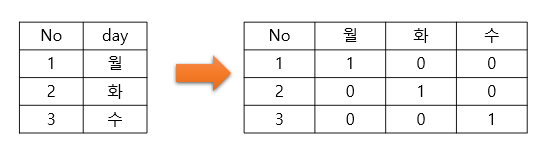

In [ ]:
# normalize 진행
## 평균(m)과 표준편차(s)를 구해서 이용 >> 정규분포로 바꿔 줌
## column 이 많으면 for문을 쓰고, 적은 경우는 한줄로 적용 가능
cols_to_normalize = ["zone_lat", "zone_lng"]
for c in cols_to_normalize:
  m = data[c].mean()
  s = data[c].std()
  data[c] = (data[c] - m) / (s + 10**(-9))
data.head()

# 결과 - 값이 대부분 0~1 사이에 들어감

,reservation_id,reservation_return_at,reservation_start_at,member_age,zone_name,zone_address,zone_lat,zone_lng,reservation_created_lat,reservation_created_lng,...,zone_type3_ETC,zone_type3_LIVING_APT,zone_type3_LIVING_ETC,zone_type3_LIVING_VILLA,zone_type3_SCHOOL_IN,zone_type3_SCHOOL_OUT,zone_type3_TRANSFER_BUS,zone_type3_TRANSFER_SUBWAY,zone_type3_TRANSFER_TERMINAL,zone_type3_nan
0,19600422,2019-01-01 17:33:42,2018-12-31 17:30:00,48,SK주차장,서울 강서구 방화동 500-8,0.448801,-0.595503,NaN,NaN,...,0,0,0,0,0,0,0,1,0,0
1,19637831,2019-01-01 12:08:55,2018-12-31 16:00:00,25,우정유료주차장,울산 남구 삼산동 1481-10,-2.741047,3.563270,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,19670646,2019-01-02 17:30:00,2019-01-02 14:50:00,34,월드애비뉴,경기 김포시 구래동 6880-7,0.562428,-0.885409,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
3,19692831,2019-01-01 20:53:09,2018-12-31 11:00:00,23,제뉴빌딩주차장,경기 남양주시 호평동 642-2,0.576976,0.126237,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,19728911,2019-01-04 14:06:03,2019-01-03 08:00:00,35,용정주차장,서울 강서구 방화동 608-9,0.436548,-0.576507,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
# 다음으로는 예약 시간에 대한 data를 정리
## 실제 의미 있는 data 는 총 대여시간!! (시간, 반납 시간을 이용해서 계산 가능)
## 현재 예약 시작, 반납 시간은 str 이라서 단순 계산은 불가능
## datetime 이라는 datatype 을 이용하자!!! (시간의 뺄셈 직접 가능)

# column 즉, 해당 series 를 to_datetime 을 이용해 새로운 seriese 로 정의
# 새로운 두 series 를 서로 뺀다 (index-wise 하게 계산됨)
# .dt.seconds 를 통해 '초'로 바꿔주고 이를 60 으로 두번 나눠서 '시' 의 단위로 변환
timegap = (pd.to_datetime(data["reservation_return_at"]) - pd.to_datetime(data["reservation_start_at"])).dt.seconds / 60 / 60
timegap

0          0.061667
1         20.148611
2          2.666667
3          9.885833
4          6.100833
            ...    
751544     1.020556
751545     0.687222
751546     0.621667
751547     0.518889
751548     0.307222
Length: 751549, dtype: float64

In [ ]:
# 계산한 값이 저장된 timegap 이라는 series 를 새로운 column을 만들어서 연결
data["reservation_time"] = timegap
data.head()

,reservation_id,reservation_return_at,reservation_start_at,member_age,zone_name,zone_address,zone_lat,zone_lng,reservation_created_lat,reservation_created_lng,...,zone_type3_LIVING_APT,zone_type3_LIVING_ETC,zone_type3_LIVING_VILLA,zone_type3_SCHOOL_IN,zone_type3_SCHOOL_OUT,zone_type3_TRANSFER_BUS,zone_type3_TRANSFER_SUBWAY,zone_type3_TRANSFER_TERMINAL,zone_type3_nan,reservation_time
0,19600422,2019-01-01 17:33:42,2018-12-31 17:30:00,48,SK주차장,서울 강서구 방화동 500-8,0.448801,-0.595503,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0.061667
1,19637831,2019-01-01 12:08:55,2018-12-31 16:00:00,25,우정유료주차장,울산 남구 삼산동 1481-10,-2.741047,3.563270,NaN,NaN,...,0,0,0,0,0,0,0,0,0,20.148611
2,19670646,2019-01-02 17:30:00,2019-01-02 14:50:00,34,월드애비뉴,경기 김포시 구래동 6880-7,0.562428,-0.885409,NaN,NaN,...,0,0,0,0,0,0,0,0,0,2.666667
3,19692831,2019-01-01 20:53:09,2018-12-31 11:00:00,23,제뉴빌딩주차장,경기 남양주시 호평동 642-2,0.576976,0.126237,NaN,NaN,...,0,0,0,0,0,0,0,0,0,9.885833
4,19728911,2019-01-04 14:06:03,2019-01-03 08:00:00,35,용정주차장,서울 강서구 방화동 608-9,0.436548,-0.576507,NaN,NaN,...,0,0,0,0,0,0,0,0,0,6.100833


In [ ]:
# 예약 id, 시작&반납 시간은 이제 의미 없으므로 날리자!!!
# 이 때 column 에서 drop을 할 것이므로 index=1 (1: col, 0: idx)
data.drop(["reservation_id", "reservation_return_at", "reservation_start_at"], axis=1, inplace=True)
data

,member_age,zone_name,zone_address,zone_lat,zone_lng,reservation_created_lat,reservation_created_lng,region_0.0,region_1.0,region_2.0,...,zone_type3_LIVING_APT,zone_type3_LIVING_ETC,zone_type3_LIVING_VILLA,zone_type3_SCHOOL_IN,zone_type3_SCHOOL_OUT,zone_type3_TRANSFER_BUS,zone_type3_TRANSFER_SUBWAY,zone_type3_TRANSFER_TERMINAL,zone_type3_nan,reservation_time
0,48,SK주차장,서울 강서구 방화동 500-8,0.448801,-0.595503,NaN,NaN,1,0,0,...,0,0,0,0,0,0,1,0,0,0.061667
1,25,우정유료주차장,울산 남구 삼산동 1481-10,-2.741047,3.563270,NaN,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,20.148611
2,34,월드애비뉴,경기 김포시 구래동 6880-7,0.562428,-0.885409,NaN,NaN,0,0,1,...,0,0,0,0,0,0,0,0,0,2.666667
3,23,제뉴빌딩주차장,경기 남양주시 호평동 642-2,0.576976,0.126237,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,9.885833
4,35,용정주차장,서울 강서구 방화동 608-9,0.436548,-0.576507,NaN,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,6.100833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751544,26,논현초교 공영주차장,서울 강남구 논현동 168,0.347317,-0.230943,37.508208,127.027491,0,0,0,...,0,0,0,0,0,0,0,0,0,1.020556
751545,28,이마트 분당점 별관 주차장,경기 성남시 분당구 정자동 212,0.111369,-0.078495,37.359271,127.119733,0,0,0,...,0,0,0,0,0,0,0,0,0,0.687222
751546,23,안집주차장,경기 의정부시 의정부동 172-29,0.707382,-0.191856,37.738390,127.050588,0,0,0,...,0,0,0,0,0,0,0,0,0,0.621667
751547,30,아농스오피스텔 주차타워,서울 서대문구 연희동 136-7,0.439388,-0.387676,37.566365,126.930759,0,0,0,...,0,0,0,0,0,0,0,0,0,0.518889


In [ ]:
data.head()

,member_age,zone_name,zone_address,zone_lat,zone_lng,reservation_created_lat,reservation_created_lng,region_0.0,region_1.0,region_2.0,...,zone_type3_LIVING_APT,zone_type3_LIVING_ETC,zone_type3_LIVING_VILLA,zone_type3_SCHOOL_IN,zone_type3_SCHOOL_OUT,zone_type3_TRANSFER_BUS,zone_type3_TRANSFER_SUBWAY,zone_type3_TRANSFER_TERMINAL,zone_type3_nan,reservation_time
0,48,SK주차장,서울 강서구 방화동 500-8,0.448801,-0.595503,NaN,NaN,1,0,0,...,0,0,0,0,0,0,1,0,0,0.061667
1,25,우정유료주차장,울산 남구 삼산동 1481-10,-2.741047,3.563270,NaN,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,20.148611
2,34,월드애비뉴,경기 김포시 구래동 6880-7,0.562428,-0.885409,NaN,NaN,0,0,1,...,0,0,0,0,0,0,0,0,0,2.666667
3,23,제뉴빌딩주차장,경기 남양주시 호평동 642-2,0.576976,0.126237,NaN,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,9.885833
4,35,용정주차장,서울 강서구 방화동 608-9,0.436548,-0.576507,NaN,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,6.100833


### Group by

In [ ]:
data = pd.read_csv(f_names[1])
data.head(10)

,reservation_id,region,reservation_return_at,reservation_start_at,member_age,member_gender,car_name,zone_name,zone_address,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,reservation_created_lat,reservation_created_lng
0,19600422,서울특별시 강서구,2019-01-01 17:33:42,2018-12-31 17:30:00,48,male,아반떼AD,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY,NaN,NaN
1,19637831,울산광역시 남구,2019-01-01 12:08:55,2018-12-31 16:00:00,25,male,스포티지,우정유료주차장,울산 남구 삼산동 1481-10,35.536034,129.339783,TRANSFER_TERMINAL,TRANSFER_TERMINAL,COMMERCIAL_HOTSPOT,NaN,NaN
2,19670646,경기도 김포시,2019-01-02 17:30:00,2019-01-02 14:50:00,34,male,카니발 11인승,월드애비뉴,경기 김포시 구래동 6880-7,37.645571,126.627879,LIVING_APT,COMMERCIAL_HOTSPOT,ETC,NaN,NaN
3,19692831,경기도 남양주시,2019-01-01 20:53:09,2018-12-31 11:00:00,23,male,아반떼AD,제뉴빌딩주차장,경기 남양주시 호평동 642-2,37.654861,127.244576,LIVING_APT,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT,NaN,NaN
4,19728911,서울특별시 강서구,2019-01-04 14:06:03,2019-01-03 08:00:00,35,male,투싼(경유),용정주차장,서울 강서구 방화동 608-9,37.565186,126.816185,LIVING_ETC,TRANSFER_SUBWAY,ETC,NaN,NaN
5,19736553,서울특별시 강남구,2019-01-01 17:32:30,2018-12-29 15:00:00,28,male,그랜저IG (LPG),제일주차장,서울 강남구 대치동 1000-6,37.507687,127.066147,TRANSFER_SUBWAY,COMMERCIAL_OFFICE,COMMERCIAL_HOTSPOT,NaN,NaN
6,19744383,경기도 안양시 동안구,2019-01-03 16:08:09,2018-12-31 23:50:00,62,female,코나,관양동 산업단지(운영종료),경기 안양시 동안구 관양동 954-12,37.392315,126.972061,COMMERCIAL_INDUSTRIAL,ETC,ETC,NaN,NaN
7,19753691,서울특별시 강서구,2019-01-01 16:17:40,2019-01-01 12:00:00,26,male,클리오,웨스트엔드 3차,서울 강서구 내발산동 750-10,37.553017,126.826775,LIVING_APT,COMMERCIAL_HOTSPOT,ETC,NaN,NaN
8,19758882,경기도 성남시 수정구,2019-01-07 14:28:12,2019-01-02 10:30:00,60,male,티볼리(경유),위례푸른초등학교 앞,경기 성남시 수정구 창곡동 521,37.469258,127.151721,LIVING_APT,LIVING_ETC,LIVING_VILLA,NaN,NaN
9,19765874,서울특별시 강서구,2019-01-03 19:51:13,2019-01-03 18:10:00,32,NaN,더뉴레이,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY,NaN,NaN


In [ ]:
# '서울 특별시 강서구' 에서 빌린 사람들의 나이 평균과 '울산광역시 남구'에서 빌린 사람들의 나이 평균을 내보자!!!
'''
방법 1 
------- region 에서 '서울 특별시 강서구' 인 것들만 뽑고, 그 결과의 'member_age'에 접근해서 평균을 내준다
 ex) data["region"] == '서울 특별시 강서구'  --> index 가 T/F 로 표현되고 
    그 결과를 data[data["region"] == '서울 특별시 강서구'] 를 통해 dataframe 으로 만들고
    data[data["region"] == '서울 특별시 강서구']["member_age"].mean() 으로 'member_age'의 평균 계산
'''

'''
방법 2
------- pandas 는 위 작업 을 단순화 하기 위해 groupby 라는 내장함수를 지원함
'''

# by= 이 후 값이 [] 로 되어 있다는 말은 ===>> 여러 인수를 넣을 수 있다는 뜻 -- 다음 행 참조
data.groupby(by=["region"])["member_age"].mean()

region
경기도 고양시 덕양구     30.353712
경기도 고양시 일산동구    31.435529
경기도 고양시 일산서구    31.580052
경기도 광명시         31.727887
경기도 구리시         29.487818
경기도 김포시         31.105116
경기도 남양주시        30.204890
경기도 성남시 분당구     31.732675
경기도 성남시 수정구     29.733926
경기도 성남시 중원구     29.845486
경기도 안양시 동안구     30.599398
경기도 안양시 만안구     30.298405
경기도 양평군         29.590894
경기도 의정부시        29.111596
경기도 하남시         29.720051
경기도 화성시         29.569094
부산광역시 강서구       36.082847
서울특별시 강남구       32.064085
서울특별시 강서구       31.377791
서울특별시 동대문구      30.054072
서울특별시 서대문구      30.566794
서울특별시 성북구       30.043091
세종특별자치시 세종시     29.528599
울산광역시 남구        28.015983
울산광역시 동구        28.684711
울산광역시 북구        28.682022
울산광역시 울주군       35.762837
울산광역시 중구        28.071299
전라북도 전주시 덕진구    30.196742
전라북도 전주시 완산구    27.015653
Name: member_age, dtype: float64

In [ ]:
data.groupby(by=["region", "member_gender"])["member_age"].mean()
# 결과 - 해당 region 의 gender 별 나이 평균!!

region        member_gender
경기도 고양시 덕양구   female           32.641741
              male             29.805353
경기도 고양시 일산동구  female           32.866831
              male             30.897121
경기도 고양시 일산서구  female           33.695723
              male             30.959177
경기도 광명시       female           32.092902
              male             31.676480
경기도 구리시       female           31.769458
              male             28.889254
경기도 김포시       female           32.853154
              male             30.315389
경기도 남양주시      female           32.331453
              male             29.364051
경기도 성남시 분당구   female           33.109114
              male             31.402874
경기도 성남시 수정구   female           31.851709
              male             29.227154
경기도 성남시 중원구   female           31.102547
              male             29.521356
경기도 안양시 동안구   female           31.296432
              male             30.417699
경기도 안양시 만안구   female           31.576407
              male           

In [ ]:
# groupby 함수에 describe() 사용 가능 (숫자 관련 통계치 확인 - 수, 평균, 표준편차, 최소 ~ 최대)
data.groupby(by=["region", "member_gender"])["member_age"].describe()

# groupby 는 '큰 데이터', '중복되는 category column있을 때'  유용!!!

count       mean        std   min   25%   50%  \
region       member_gender                                                    
경기도 고양시 덕양구  female          5055.0  32.641741   9.401650  21.0  25.0  30.0   
             male           20473.0  29.805353   8.212708  21.0  24.0  27.0   
경기도 고양시 일산동구 female          8110.0  32.866831   9.448135  21.0  25.0  30.0   
             male           23066.0  30.897121   9.071670  21.0  24.0  28.0   
경기도 고양시 일산서구 female          3694.0  33.695723   9.351806  21.0  26.0  31.0   
             male           12052.0  30.959177   8.959622  21.0  24.0  28.0   
경기도 광명시      female          3466.0  32.092902   8.708028  21.0  25.0  30.0   
             male           18648.0  31.676480   8.759520  21.0  25.0  29.0   
경기도 구리시      female          2711.0  31.769458   9.409717  21.0  25.0  29.0   
             male           10032.0  28.889254   7.774870  21.0  24.0  27.0   
경기도 김포시      female          6088.0  32.853154   9.403804  21.0  25.0  31.0   
             male           14842.0  30.315389   8.689722  21.0  24.0  27.0   
경기도 남양주시     female          7090.0  32.331453   9.714815  21.0  24.0  29.0   
             male           18849.0  29.364051   8.989140  21.0  23.0  26.0   
경기도 성남시 분당구  female          8844.0  33.109114   9.343615  21.0  26.0  30.0   
             male           36674.0  31.402874   8.411007  21.0  25.0  29.0   
경기도 성남시 수정구  female          3365.0  31.851709   9.371241  21.0  25.0  29.0   
             male           14959.0  29.227154   7.843136  21.0  24.0  27.0   
경기도 성남시 중원구  female          3062.0  31.102547   8.762610  21.0  25.0  28.0   
             male           12830.0  29.521356   7.866677  21.0  24.0  27.0   
경기도 안양시 동안구  female          4372.0  31.296432   8.948643  21.0  25.0  28.0   
             male           18159.0  30.417699   8.379014  21.0  24.0  28.0   
경기도 안양시 만안구  female          3128.0  31.576407   9.342157  21.0  25.0  28.0   
             male           13322.0  29.927714   8.341680  21.0  24.0  27.0   
경기도 양평군      female           922.0  32.560738  10.267598  21.0  25.0  28.0   
             male            2005.0  28.285287   8.454965  21.0  23.0  25.0   
경기도 의정부시     female          5572.0  30.873833   9.408253  21.0  24.0  27.5   
             male           18894.0  28.572563   7.718037  21.0  23.0  26.0   
경기도 하남시      female          2857.0  30.944697   7.790213  21.0  25.0  29.0   
             male           10117.0  29.494415   7.534689  21.0  24.0  27.0   
경기도 화성시      female          7342.0  30.909561   8.138579  21.0  25.0  28.0   
             male           27174.0  29.220137   7.680796  21.0  24.0  27.0   
부산광역시 강서구    female          1743.0  34.589788   9.011209  21.0  27.0  33.0   
             male            8733.0  36.401924   9.070430  21.0  29.0  36.0   
서울특별시 강남구    female         19750.0  32.367494   8.404692  21.0  26.0  30.0   
             male           76435.0  31.945758   7.793607  21.0  26.0  30.0   
서울특별시 강서구    female         15178.0  32.037818   8.460927  21.0  26.0  30.0   
             male           60248.0  31.189069   7.802447  21.0  26.0  29.0   
서울특별시 동대문구   female          6177.0  31.244779   7.930498  21.0  25.0  29.0   
             male           30068.0  29.719336   7.231387  21.0  25.0  28.0   
서울특별시 서대문구   female          7250.0  31.697241   9.069028  21.0  25.0  29.0   
             male           31323.0  30.277017   7.924782  21.0  25.0  28.0   
서울특별시 성북구    female          7307.0  31.222116   8.693747  21.0  25.0  29.0   
             male           32971.0  29.723393   8.177118  21.0  24.0  27.0   
세종특별자치시 세종시  female          3429.0  31.525226   9.382154  21.0  24.0  29.0   
             male           11262.0  29.051589   8.003202  21.0  24.0  26.0   
울산광역시 남구     female          4848.0  28.609530   7.584444  21.0  23.0  26.0   
             male           16603.0  27.858520   7.585495  21.0  23.0  25.0   
울산광역시 동구     female          1030.0  28.603883   6.441211  21.0  25.0  27.0   
 

### Visualization

DataFrame을 보는 것 만으로는 data의 형태나 분포 등을 파악하기가 어렵습니다.

data의 분포 특징을 이해하고 사용하기 위해서는 각 features들을 visualization해서 보는 것이 도움이 많이 됩니다.

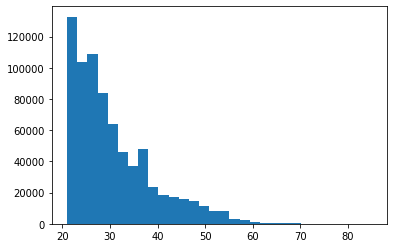

In [ ]:
# data 의 분포를 확인하기에 좋다!!
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.hist(data["member_age"], bins=30)
fig.show()